In [1]:
# imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
# ignore warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline
plotsize = (13, 5)

# Overview

In this code we are going to start with Credit Status Analysis, where we analyze the distribution of credit statuses (e.g., "Current," "In Arrears," "Defaulted," etc.) to understand the overall health of the credit portfolio. This will help in identifying potential credit risks.
This kind of analysis could be conducted over different periods of time, such as months, quarter, and years. We have considered all 3 of them here.


In [6]:
file_path = "../dataset/credit_info.csv";
data = pd.read_csv(file_path, low_memory=False);
# Use describe() to get summary statistics of the DataFrame
description = data.describe()

In [7]:
description

,Service Charge Rate,Original Principal Amount (US$),Cancelled Amount (US$),Undisbursed Amount (US$),Disbursed Amount (US$),Repaid to IDA (US$),Due to IDA (US$),Borrower's Obligation (US$),Sold 3rd Party (US$),Repaid 3rd Party (US$),Due 3rd Party (US$),Credits Held (US$)
count,"1,068,915.0","1,190,775.0","1,190,773.0","1,190,775.0","1,190,773.0","1,190,773.0","1,190,773.0","1,190,773.0","1,190,773.0","1,190,773.0","1,190,773.0","1,190,775.0"
mean,0.8,"44,004,777.1","2,912,057.8","8,189,145.9","33,173,347.4","11,792,029.8","18,184,739.4","18,184,739.4","13,087.6","13,087.6",0.0,"26,373,854.8"
std,0.5,"68,822,805.7","17,752,065.1","36,216,692.0","53,763,536.9","25,156,064.9","44,067,917.3","44,067,917.3","312,753.5","312,753.5",0.0,"58,431,683.7"
min,0.0,0.0,0.0,"-30,831,500.0","-7,829,253.1",0.0,-5.4,-5.4,0.0,0.0,0.0,"-30,831,500.0"
25%,0.8,"9,000,000.0",0.0,0.0,"5,292,987.4",0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.8,"20,000,000.0",46.8,0.0,"14,936,725.8","2,220,263.2","1,192,401.6","1,192,401.6",0.0,0.0,0.0,"4,298,147.7"
75%,0.8,"50,000,000.0","718,709.1",0.0,"37,935,316.2","12,290,539.8","16,513,879.2","16,513,879.2",0.0,0.0,0.0,"25,569,885.0"
max,7.0,"1,200,000,000.0","1,200,000,000.0","1,263,214,128.0","1,096,893,255.0","561,766,292.0","1,026,319,026.2","1,026,319,026.2","17,500,000.0","17,500,000.0",0.0,"1,263,214,128.0"


In [8]:
display(data.columns)

Index(['End of Period', 'Credit Number', 'Region', 'Country Code', 'Country',
       'Borrower', 'Credit Status', 'Service Charge Rate',
       'Currency of Commitment', 'Project ID', 'Project Name',
       'Original Principal Amount (US$)', 'Cancelled Amount (US$)',
       'Undisbursed Amount (US$)', 'Disbursed Amount (US$)',
       'Repaid to IDA (US$)', 'Due to IDA (US$)', 'Exchange Adjustment (US$)',
       'Borrower's Obligation (US$)', 'Sold 3rd Party (US$)',
       'Repaid 3rd Party (US$)', 'Due 3rd Party (US$)', 'Credits Held (US$)',
       'First Repayment Date', 'Last Repayment Date', 'Agreement Signing Date',
       'Board Approval Date', 'Effective Date (Most Recent)',
       'Closed Date (Most Recent)', 'Last Disbursement Date'],
      dtype='object')

# 1. Data Preprocessing

In [9]:
# Calculating total number of loan 
total_loans = len(data)
total_loans

1190775

In [11]:
display(data['Credit Status'].head())

0    Fully Repaid
1        Repaying
2    Fully Repaid
3    Fully Repaid
4    Fully Repaid
Name: Credit Status, dtype: object

You can see here we have 15 different Credit statuses in our Dataset

In [12]:
data['Credit Status'].unique()

array(['Fully Repaid', 'Repaying', 'Fully Cancelled', 'Effective',
       'Disbursing&Repaying', 'Fully Disbursed', 'Terminated',
       'Disbursing', 'Signed', 'Approved', 'Repaid', 'Cancelled',
       'Disbursed', 'Negotiated', 'Draft'], dtype=object)

# 2. Data Exploration

In [14]:
credit_status_frequency = data['Credit Status'].value_counts()
credit_status_frequency

Credit Status
Repaying               340524
Fully Repaid           236362
Disbursing             191485
Fully Disbursed        137725
Disbursed              136188
Repaid                  74930
Effective               20764
Approved                13359
Signed                  11648
Disbursing&Repaying     11177
Fully Cancelled          9927
Terminated               3761
Cancelled                2866
Draft                      58
Negotiated                  1
Name: count, dtype: int64

# 3. Credit Status Distribution

In [15]:
credit_status_percentage = credit_status_frequency / total_loans * 100

In [16]:
display(credit_status_percentage)

Credit Status
Repaying              28.6
Fully Repaid          19.8
Disbursing            16.1
Fully Disbursed       11.6
Disbursed             11.4
Repaid                 6.3
Effective              1.7
Approved               1.1
Signed                 1.0
Disbursing&Repaying    0.9
Fully Cancelled        0.8
Terminated             0.3
Cancelled              0.2
Draft                  0.0
Negotiated             0.0
Name: count, dtype: float64

In [19]:
data['End of Period'] = pd.to_datetime(data['End of Period'])
data['End of Period'].head()

0   2022-06-30
1   2022-06-30
2   2022-06-30
3   2022-06-30
4   2022-06-30
Name: End of Period, dtype: datetime64[ns]

# 4. Credit Status Trends Over Time

In [39]:
 # Group data by 'End of Period' and 'Credit Status' and count the occurrences
credit_status_trends = data.groupby(['End of Period', 'Credit Status']).size().unstack(fill_value=0)
credit_status_trends.head()

Credit Status,Approved,Cancelled,Disbursed,Disbursing,Disbursing&Repaying,Draft,Effective,Fully Cancelled,Fully Disbursed,Fully Repaid,Negotiated,Repaid,Repaying,Signed,Terminated
End of Period,,,,,,,,,,,,,,,
2011-04-30,94,0,0,1188,11,2,88,69,736,1871,0,0,2235,51,17
2011-05-31,99,0,0,1199,11,2,75,69,742,1895,0,0,2220,68,17
2011-06-30,145,0,0,1191,11,2,72,69,757,1897,0,0,2238,79,18
2011-07-31,119,0,0,1170,14,2,74,69,775,1897,1,0,2248,105,18
2011-08-31,87,0,0,1169,18,2,85,69,782,1905,0,0,2244,119,18


In [49]:
# credit_status_trends['End of Period'] = pd.to_datetime(data['End of Period'])
# credit_status_trends.set_index('End of Period', inplace=True)
credit_trend_description = credit_status_trends.describe()
display(credit_trend_description)

Credit Status,Approved,Cancelled,Disbursed,Disbursing,Disbursing&Repaying,Draft,Effective,Fully Cancelled,Fully Disbursed,Fully Repaid,Negotiated,Repaid,Repaying,Signed,Terminated
count,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0
mean,90.9,19.5,926.4,"1,302.6",76.0,0.4,141.3,67.5,936.9,"1,607.9",0.0,509.7,"2,316.5",79.2,25.6
std,32.0,34.4,"1,634.8",177.8,82.4,0.8,57.4,40.1,573.1,925.1,0.1,898.2,"1,400.2",22.3,7.1
min,33.0,0.0,0.0,"1,093.0",0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,17.0
25%,66.0,0.0,0.0,"1,168.5",11.0,0.0,98.5,69.0,739.0,"1,883.0",0.0,0.0,"2,227.5",63.5,19.5
50%,87.0,0.0,0.0,"1,206.0",37.0,0.0,120.0,88.0,"1,285.0","2,128.0",0.0,0.0,"2,897.0",73.0,23.0
75%,111.0,0.0,0.0,"1,459.5",118.5,0.0,162.5,96.0,"1,397.5","2,168.5",0.0,0.0,"3,367.5",94.5,32.0
max,188.0,82.0,"4,071.0","1,716.0",296.0,2.0,300.0,110.0,"1,453.0","2,355.0",1.0,"2,124.0","3,859.0",150.0,39.0


# Plot credit status trends over time

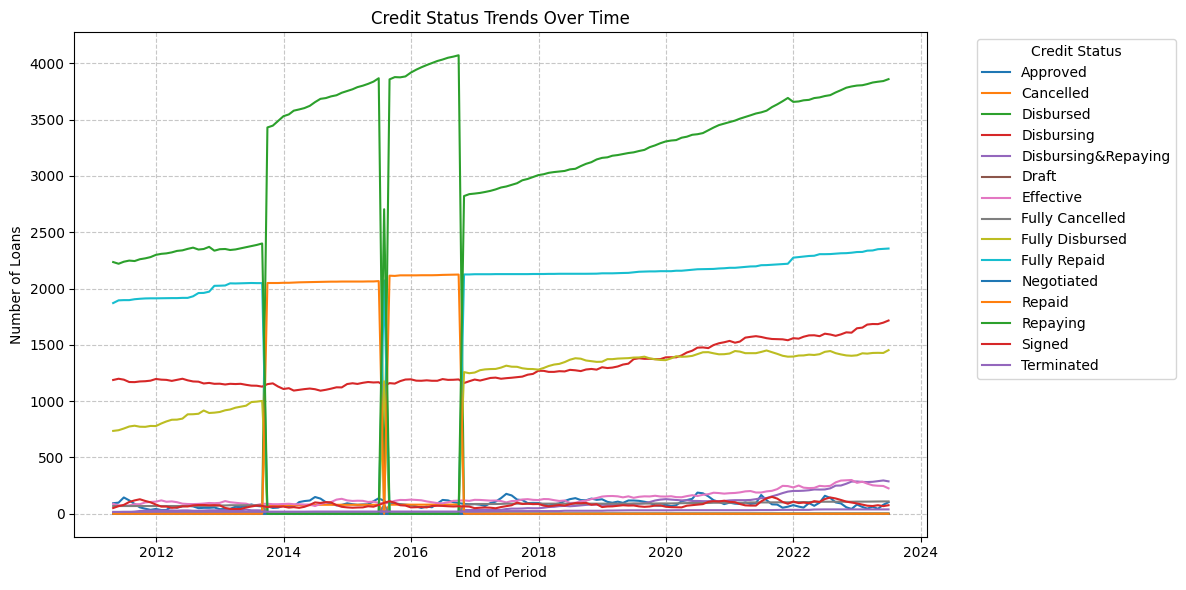

In [40]:
plt.figure(figsize=(12, 6))
for status in credit_status_trends.columns:
    plt.plot(credit_status_trends.index, credit_status_trends[status], label=status)
plt.xlabel('End of Period')
plt.ylabel('Number of Loans')
plt.title('Credit Status Trends Over Time')
plt.legend(title='Credit Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [42]:
# Change 'Q' to 'A' if you want to convert to annual frequency
credit_data_quarterly = credit_status_trends.resample('Q').sum()
credit_data_Annual    = credit_status_trends.resample('A').sum()

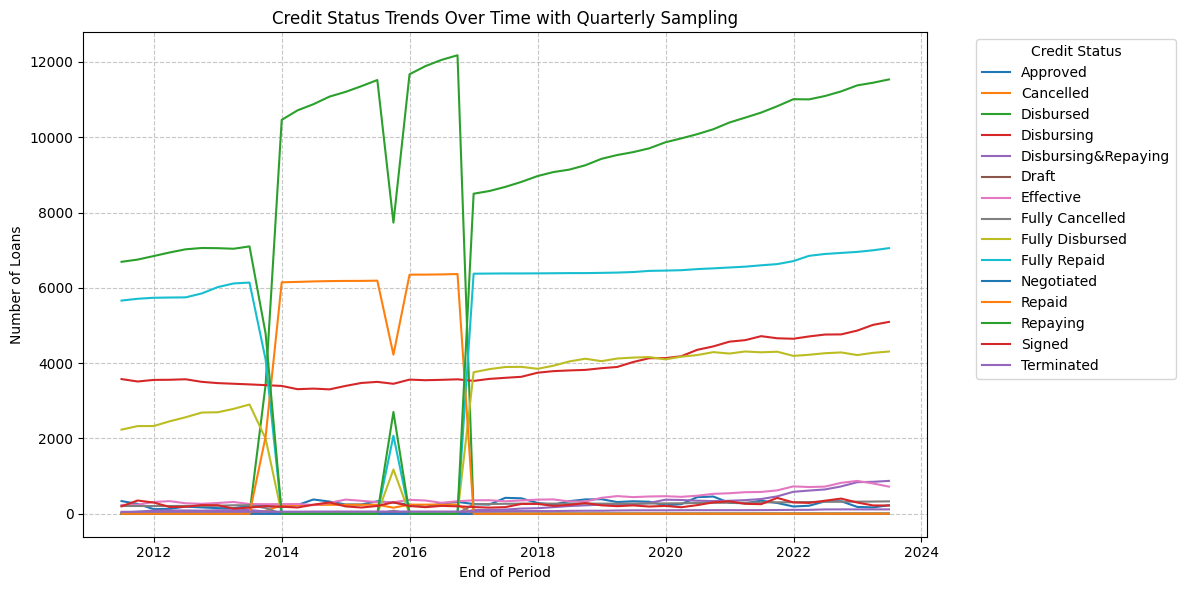

In [51]:

# Plot credit status trends over time
# Plot credit status trends over time using a line chart
plt.figure(figsize=(12, 6))
for status in credit_data_quarterly.columns:
    plt.plot(credit_data_quarterly.index, credit_data_quarterly[status], label=status)

plt.xlabel('End of Period')
plt.ylabel('Number of Loans')
plt.title('Credit Status Trends Over Time with Quarterly Sampling')
plt.legend(title='Credit Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 

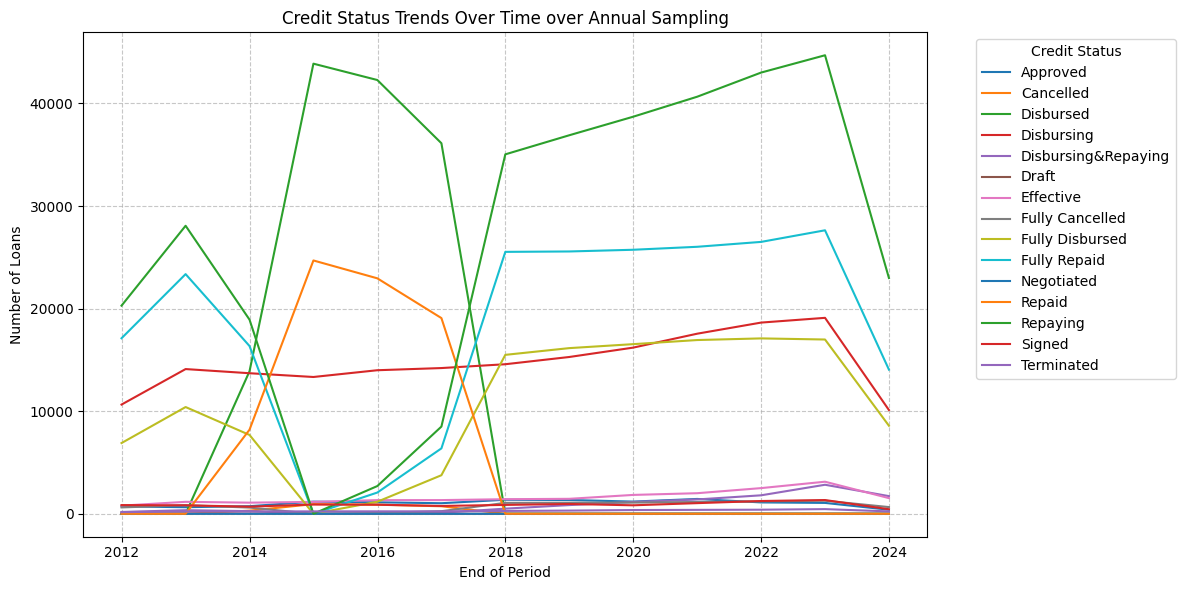

In [50]:
plt.figure(figsize=(12, 6))
for status in credit_data_Annual.columns:
    plt.plot(credit_data_Annual.index, credit_data_Annual[status], label=status)

plt.xlabel('End of Period')
plt.ylabel('Number of Loans')
plt.title('Credit Status Trends Over Time over Annual Sampling')
plt.legend(title='Credit Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 

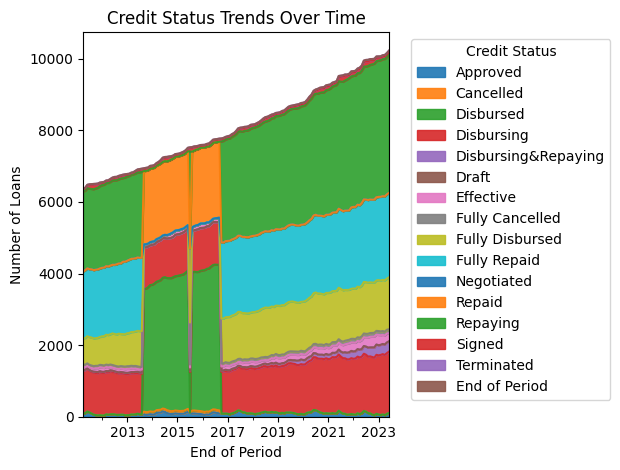

In [33]:
# Plot credit status trends over time
credit_status_trends.plot(kind='area', stacked=True, alpha=0.9)
plt.xlabel('End of Period')
plt.ylabel('Number of Loans')
plt.title('Credit Status Trends Over Time')
plt.legend(title='Credit Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

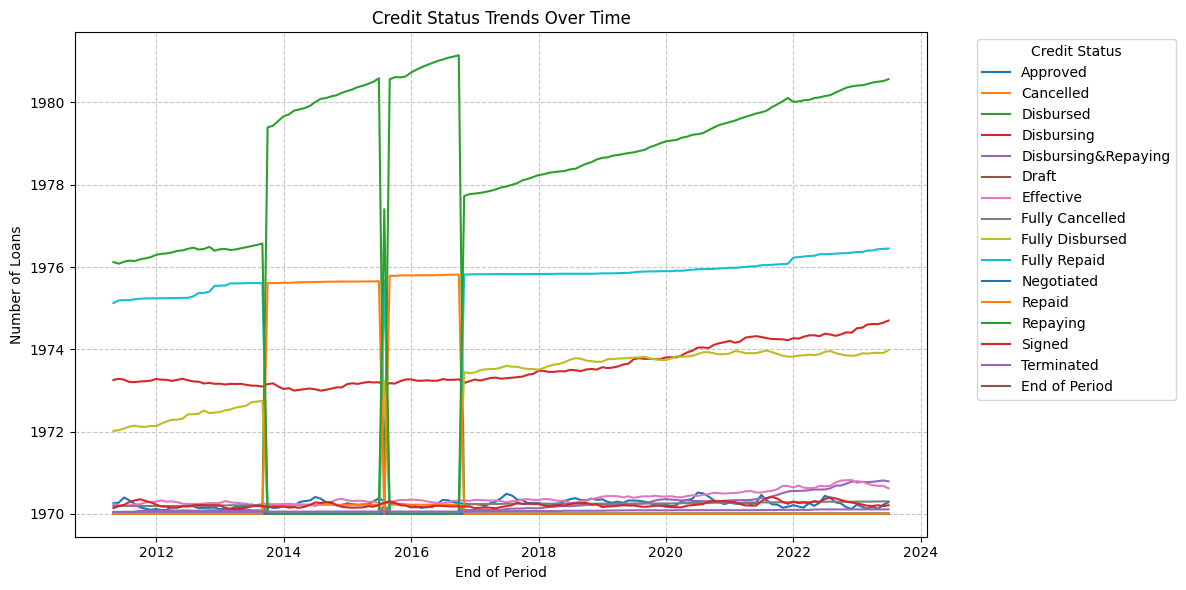

In [47]:
# data['End of Period in Month'] = pd.to_datetime(data['End of Period']).dt.strftime('%Y-%m')

In [52]:
# data['End of Period in Month'].unique()

In [49]:
#  # Group data by 'End of Period' and 'Credit Status' and count the occurrences
# credit_status_trends_by_Month = data.groupby(['End of Period in Month', 'Credit Status']).size().unstack(fill_value=0)

In [53]:
# credit_status_trends_by_Month

In [54]:
# plt.figure(figsize=(15, 6))
# for status in credit_status_trends_by_Month.columns:
#     plt.plot(credit_status_trends_by_Month.index, credit_status_trends[status], label=status)

# plt.xlabel('End of Period by Month')
# plt.ylabel('Number of Loans')
# plt.title('Credit Status Trends Over Time by Months')
# plt.legend(title='Credit Status', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()